In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df_trainset_values = 'data/trainset_values.csv'
df_trainset_labels = 'data/trainset_labels.csv'

df_X = pd.read_csv(df_trainset_values)
df_y = pd.read_csv(df_trainset_labels)

print(df_X.shape)
print(df_y.shape)

### Overview

##### Tanzania is a vast east African country with a geographically dispersed population.  It is known for agricultural, mining, fishing, and tourism (Africa's tallest mountain Kilimanjaro) as major economic drivers. In order to support these activities, the Tanzanian Ministry of Water installed water wells in numerous locations.  Tasked with the maintenance and long-term care of these valuable water sources, the Ministry of Water needs help predicting which of the pumps at their water wells will fail in order to allocate repair resources accordingly.

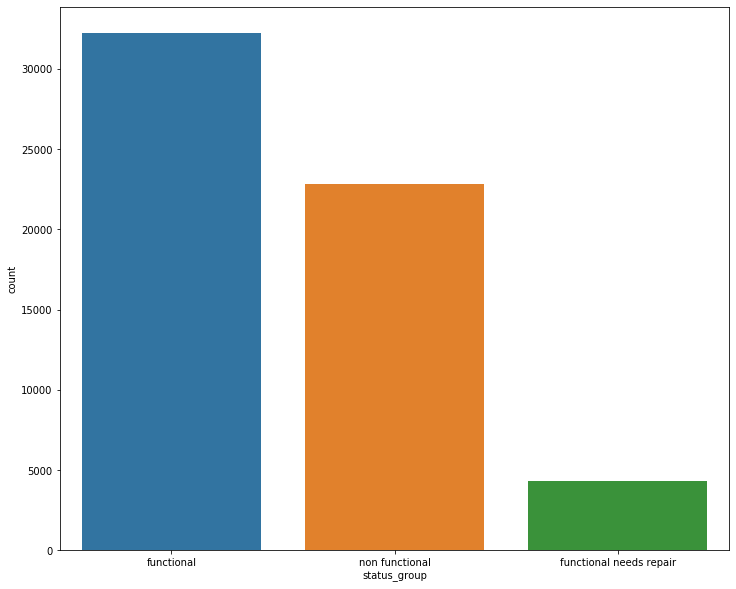

In [5]:
plt.figure(figsize=(12,10))
x = df_y['status_group']
sns.countplot(data = x, x = x.index)
#plt.savefig('img/pump_status_sns.jpg')

In [6]:
df_merged = df_X.merge(df_y, on='id')

df_merged['status_group'] = df_merged['status_group'].apply(lambda x: x.replace(' ','_'))

non_functional = df_merged[df_merged['status_group'] == 'non_functional'].installer.value_counts(normalize=True).head(3)
functional_needs_repair = df_merged[df_merged['status_group'] == 'functional_needs_repair'].installer.value_counts(normalize=True).head(3)

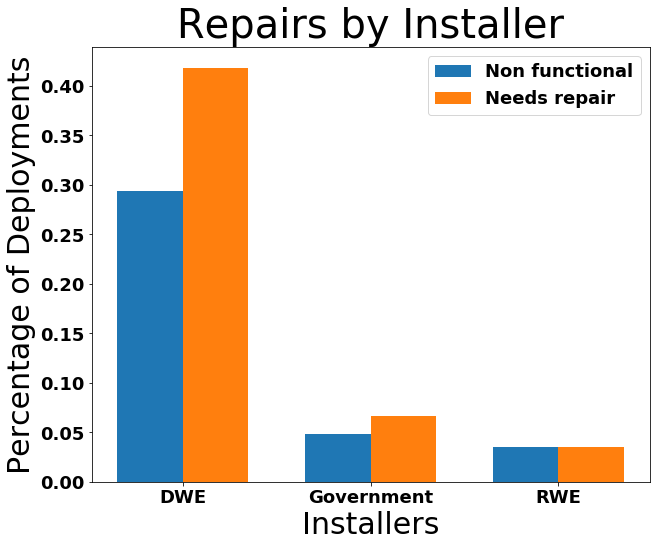

In [7]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

N = 3
plt.figure(figsize=(10,8))
ind = np.arange(N) 
width = 0.35     

xn=non_functional
xr=functional_needs_repair
plt.bar(ind, xn, width, label='Non functional')
plt.bar(ind + width, xr, width, label='Needs repair')
plt.ylabel('Percentage of Deployments', fontsize=30)
plt.title('Repairs by Installer', fontsize=40)
plt.xlabel('Installers', fontsize=30)
plt.xticks(ind + width / 2, (xr.index))
plt.legend(loc='best')
#plt.savefig('img/repairs_installers.jpg')
plt.show();

In [8]:
total_pop = df_merged.population.sum()
pop_fun = df_merged[df_merged['status_group'] == 'functional'].population.sum()
pop_nonf = df_merged[df_merged['status_group'] == 'non_functional'].population.sum()
pop_needs = df_merged[df_merged['status_group'] == 'functional_needs_repair'].population.sum()

In [9]:
print('The total population serviced by pumps is {:,}'.format(total_pop))
print('Population affected by Functional pumps is {:,}'.format(pop_fun))
print('Population affected by Non-functional pumps is {:,}'.format(pop_nonf))
print('Population affected by pumps that need repair is {:,}'.format(pop_needs))

The total population serviced by pumps is 10,686,653
Population affected by Functional pumps is 6,050,282
Population affected by Non-functional pumps is 3,880,455
Population affected by pumps that need repair is 755,916


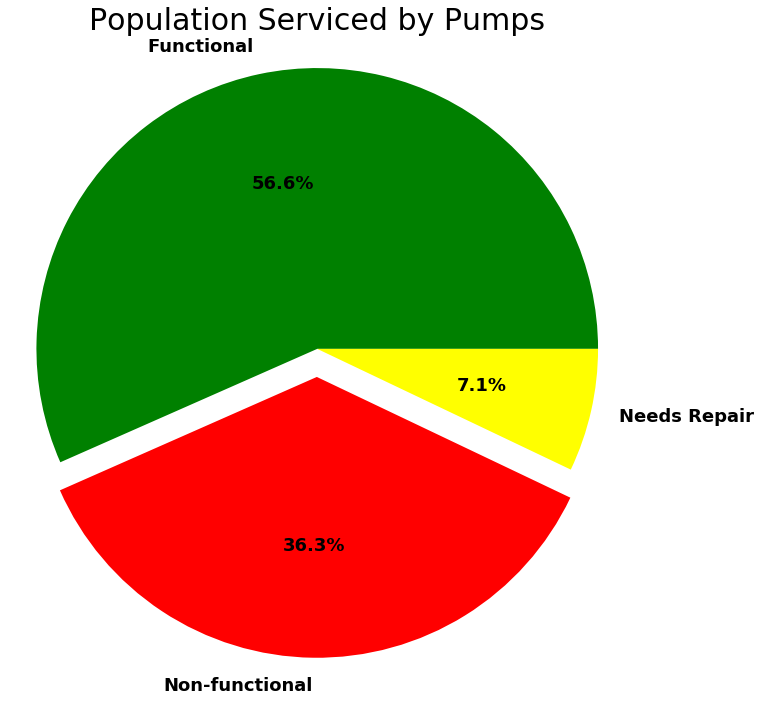

In [10]:
categories = ['Functional', 'Non-functional', 'Needs Repair']
numbers = [pop_fun, pop_nonf, pop_needs]
colors = ['green', 'red', 'yellow']
explode = (0, 0.1, 0)

plt.figure(figsize=(15,12))
plt.pie(numbers, explode=explode, labels=categories, autopct='%1.1f%%',colors=colors, shadow=False)

plt.axis('scaled')
plt.title('Population Serviced by Pumps', fontsize=30)
#plt.savefig('img/pump_pop.jpg')

plt.show();

In [11]:
lat_fun = df_merged[df_merged['status_group'] == 'functional'].latitude.values
lon_fun = df_merged[df_merged['status_group'] == 'functional'].longitude.values
pop_fun = df_merged[df_merged['status_group'] == 'functional'].population.values

lat_non = df_merged[df_merged['status_group'] == 'non_functional'].latitude.values
lon_non = df_merged[df_merged['status_group'] == 'non_functional'].longitude.values
pop_non = df_merged[df_merged['status_group'] == 'non_functional'].population.values

lat_rep = df_merged[df_merged['status_group'] == 'functional_needs_repair'].latitude.values
lon_rep = df_merged[df_merged['status_group'] == 'functional_needs_repair'].longitude.values
pop_rep = df_merged[df_merged['status_group'] == 'functional_needs_repair'].population.values

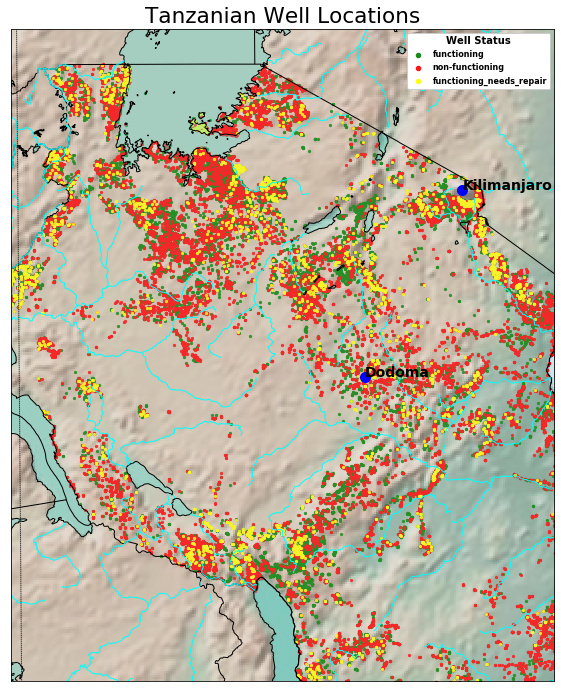

In [12]:
# map background
fig = plt.figure(figsize=(12, 12))

m = Basemap(projection='lcc', resolution='f', lat_0=-5.81, lon_0=34.38,width=1E6, height=1.2E6)
m.shadedrelief()

m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

m.drawcoastlines(linewidth=1, color='black')
m.drawcountries(linewidth=1, color='black')
m.drawstates(linewidth=1,color='black')
m.drawrivers(linewidth=1,color='aqua')
m.fillcontinents(alpha=.2, lake_color='aqua')
# plotting well locations
m.scatter(lon_fun, lat_fun, latlon=True,  s=5,  color='green', alpha=.9, label='functioning')
m.scatter(lon_non, lat_non, latlon=True,  s=5,  color='red', alpha=.9, label='non-functioning')
m.scatter(lon_rep, lat_rep, latlon=True,  s=5,  color='yellow', alpha=.9, label='functioning_needs_repair')
plt.legend(loc = 'upper right', markerscale=2,framealpha=1, title='Well Status', title_fontsize=10, fontsize=8)
plt.title('Tanzanian Well Locations')

lats_pts = [-3.0674, -6.1630]
lons_pts = [37.3556, 35.7516]
x,y = m(lons_pts, lats_pts)
m.plot(x, y, 'bo', markersize=10)
plt.rcParams.update({'font.size': 14}) 
labels = ['Kilimanjaro', 'Dodoma']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt, ypt, label)

#plt.savefig('img/pump_locations.jpg')

In [13]:
# Finding the center of the region for Basemap
print(sum(lat_non)/len(lat_non))
print(sum(lon_non)/len(lon_non))

-5.810393848538787
34.38100591696608


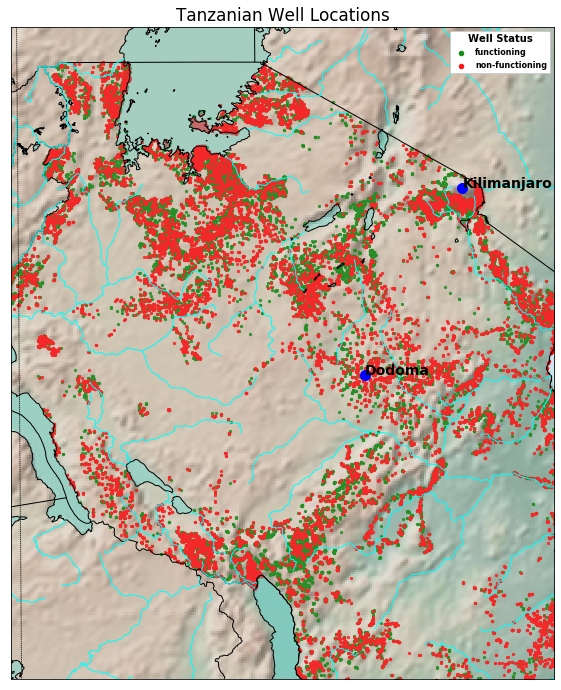

In [14]:
# second map without the 'functional_needs_repair'
fig = plt.figure(figsize=(12, 12))

m = Basemap(projection='lcc', resolution='f', lat_0=-5.81, lon_0=34.38,width=1E6, height=1.2E6)
m.shadedrelief()

m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

m.drawcoastlines(linewidth=1, color='black')
m.drawcountries(linewidth=1, color='black')
m.drawstates(linewidth=1,color='black')
m.drawrivers(linewidth=1,color='aqua')
m.fillcontinents(alpha=.2, lake_color='aqua')
# plotting well locations
m.scatter(lon_fun, lat_fun, latlon=True,  s=5,  color='green', alpha=.9, label='functioning')
m.scatter(lon_non, lat_non, latlon=True,  s=5,  color='red', alpha=.9, label='non-functioning')
#m.scatter(lon_rep, lat_rep, latlon=True,  s=5,  color='yellow', alpha=.9, label='functioning_needs_repair')
plt.legend(loc = 'upper right', markerscale=2,framealpha=1, title='Well Status', title_fontsize=10, fontsize=8)
plt.title('Tanzanian Well Locations')

lats_pts = [-3.0674, -6.1630]
lons_pts = [37.3556, 35.7516]
x,y = m(lons_pts, lats_pts)
m.plot(x, y, 'bo', markersize=10)
plt.rcParams.update({'font.size': 14}) 
labels = ['Kilimanjaro', 'Dodoma']
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt, ypt, label)

#plt.savefig('img/pump_locations_noyellow.jpg')